In [297]:
import json
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt

In [298]:
# We doen een "aanvraag" bij de API. Deze url werkt alleen als de rest server gestart is via het shell script. 
response = requests.get('http://localhost:8080/medish_centrum_randstad/api/netlify?page=1')

In [299]:
# Checken wat voor data/type we binnen hebben gekregen
response.headers['content-type']

'application/json'

In [300]:
# Van de teruggekregen data maken we een pandas dataframe
df = pd.read_json(response.text)
df.head()

,status,total_nr_of_records,nr_of_pages,page_size,next,data
0,200,8192,82,100,http://localhost:8080/medish_centrum_randstad/...,"{'genetic': 84, 'length': 180, 'mass': 90, 'ex..."
1,200,8192,82,100,http://localhost:8080/medish_centrum_randstad/...,"{'genetic': 84, 'length': 204, 'mass': 79, 'ex..."
2,200,8192,82,100,http://localhost:8080/medish_centrum_randstad/...,"{'genetic': 84, 'length': 174, 'mass': 74, 'ex..."
3,200,8192,82,100,http://localhost:8080/medish_centrum_randstad/...,"{'genetic': 84, 'length': 187, 'mass': 78, 'ex..."
4,200,8192,82,100,http://localhost:8080/medish_centrum_randstad/...,"{'genetic': 84, 'length': 187, 'mass': 89, 'ex..."


In [301]:
# wat we hier willen:

    # De data is opgeslagen in de 'data' kolom. De vorm waarin dit is opgeslagen is een dictionary (voor elke rij)
    # waarvan de keys de variabelen zijn, en de waardes de waardes voor elke 'patient'
    
    # Nu willen we dus elk dictionary verwerken tot een rij in het dataframe, zodat we een rij hebben voor elke patient
    

# Eerst heb ik alle dictionaries in een lijst gezet, om ze als het ware uit het "oude" dataframe te halen:

data_list = df.data.values.tolist()
    
# Hier kunnen we inspecteren hoe het eerste item, i.e., de eerste rij, eruit ziet:
print(data_list[0])
    

{'genetic': 84, 'length': 180, 'mass': 90, 'exercise': 2, 'smoking': 9, 'alcohol': 1, 'sugar': 2, 'lifespan': 86}


In [302]:
# Nu is het zaak om de dictionaries uit de gemaakte lijst allemaal samen te voegen in een datatframe

df_final = pd.DataFrame.from_dict(data_list)

# We kunnen ons nieuwe dataframe even bekijken:

print(df_final.head())
print()
print(df_final.tail())


   genetic  length  mass  exercise  smoking  alcohol  sugar  lifespan
0     84.0   180.0  90.0       2.0      9.0      1.0      2        86
1     84.0   204.0  79.0       3.0      2.0      7.0      3       100
2     84.0   174.0  74.0       3.0     20.0      3.0      2        87
3     84.0   187.0  78.0       2.0      6.0      5.0      3        91
4     84.0   187.0  89.0       2.0     12.0      0.0      2        83

      genetic  length  mass  exercise  smoking  alcohol  sugar  lifespan
8187     82.0   185.0  67.0       3.0     11.0      8.0      2        90
8188     82.0   183.0  72.0       2.0      1.0      5.0      4        88
8189     83.0   192.0  92.0       1.0     22.0      2.0      4        62
8190     81.0   175.0  60.0       3.0     13.0      7.0      2        93
8191     83.0   204.0  76.0       3.0      8.0      8.0      1        96


In [303]:
# Wat opvalt is dat het dataframe lijkt te zijn geordend op de variabel 'genetic', 
# bij het eerst x aantal rijen zien we dit terug:

df_final.head(30)

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan
0,84.0,180.0,90.0,2.0,9.0,1.0,2,86
1,84.0,204.0,79.0,3.0,2.0,7.0,3,100
2,84.0,174.0,74.0,3.0,20.0,3.0,2,87
3,84.0,187.0,78.0,2.0,6.0,5.0,3,91
4,84.0,187.0,89.0,2.0,12.0,0.0,2,83
5,84.0,175.0,74.0,2.0,2.0,3.0,3,89
6,84.0,196.0,68.0,2.0,14.0,8.0,1,80
7,84.0,182.0,83.0,1.0,1.0,8.0,3,77
8,84.0,176.0,91.0,1.0,17.0,1.0,2,73
9,84.0,180.0,74.0,1.0,5.0,9.0,2,73


In [338]:
# Om eventuele problemen met training/test subsets van de data te voorkomen, heb ik ervoor gekozen om de rijen
# in willekeurige volgorde te zetten:

df_final = df_final.sample(frac=1)

In [339]:
# Checken hoe het er nu uitziet:

print(df_final.head())
print()
print(df_final.tail())

# De rijen zijn nu inderdaad in willekeurige volgorde gezet.

      genetic  length  mass  exercise  smoking  alcohol  sugar  lifespan  BMI
3670       78     184    74         2       17        6      2        74   22
2244       80     184    74         3        0        2      3        97   22
2465       80     172    93         3        3        2      2       100   31
4499       82     175    74         2        4        3      4        79   24
4203       79     175    77         2        9        8      3        70   25

      genetic  length  mass  exercise  smoking  alcohol  sugar  lifespan  BMI
4901       78     182    61         1       16        8      2        67   18
7373       82     193    62         0       21        6      5        53   17
7567       82     192    96         3       12        2      4        84   26
4459       80     165    72         2        7        7      3        78   26
764        81     186    63         1        6        7      2        83   18


In [340]:
# We kunnen het dataframe checken op lege waardes:
df_final.isnull().sum()

genetic     0
length      0
mass        0
exercise    0
smoking     0
alcohol     0
sugar       0
lifespan    0
BMI         0
dtype: int64

In [341]:
df_final = df_final.dropna()

In [342]:
df_final.isnull().sum()

genetic     0
length      0
mass        0
exercise    0
smoking     0
alcohol     0
sugar       0
lifespan    0
BMI         0
dtype: int64

In [343]:
# We checken het df op duplicaten, maar in het geval van deze dataset is het niet nodig om duplicaten eruit te halen.

duplicate_rows_df = df_final[df_final.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 9)


In [344]:
# Nu is het zaak om outliers vast te stellen en deze eventueel uit de dataset te verwijderen.

# Eerst doen we nogmaals describe(), waar we tevens ook zien dat de min waardes van 'genetic', 'length' en 'mass'
# niet meer 0 zijn zoals voorheen. 

df_final.describe()

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan,BMI
count,8185.000000,8185.000000,8185.000000,8185.000000,8185.000000,8185.000000,8185.000000,8185.000000,8185.000000
mean,79.967990,183.646060,79.793158,1.616982,9.776909,5.747343,2.422724,76.096518,23.984484
std,1.635371,12.602627,12.078802,0.831051,6.965586,2.664562,0.949956,10.920533,4.905000
min,76.000000,154.000000,60.000000,0.000000,0.000000,0.000000,1.000000,40.000000,13.000000
25%,79.000000,174.000000,70.000000,1.000000,3.000000,4.000000,2.000000,68.000000,20.000000
50%,80.000000,183.000000,79.000000,1.000000,10.000000,6.000000,2.000000,76.000000,24.000000
75%,81.000000,193.000000,88.000000,2.000000,16.000000,8.000000,3.000000,83.000000,27.000000
max,84.000000,214.000000,112.000000,4.000000,22.000000,10.000000,5.000000,113.000000,47.000000


<AxesSubplot: >

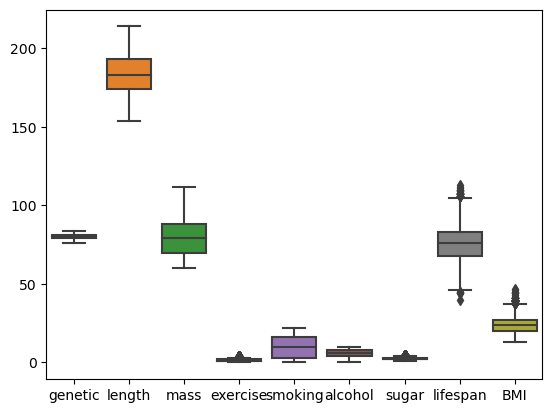

In [345]:
#Om een eerste indruk te kijgen plotten we alle variabelen als boxplots

sns.boxplot(df_final)

AxesSubplot(0.125,0.11;0.775x0.77)


,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan,BMI
8038,82,177,74,4,15,8,3,88,24
836,81,165,90,4,22,7,2,81,33
6895,79,176,91,4,0,0,3,103,29
7708,78,185,67,4,9,2,1,104,20
6775,81,188,109,4,0,1,1,107,31
...,...,...,...,...,...,...,...,...,...
1466,81,187,68,4,22,9,4,81,19
3113,79,175,74,4,2,9,2,99,24
4368,78,174,97,4,17,9,2,81,32
4596,80,198,60,4,13,7,3,94,15


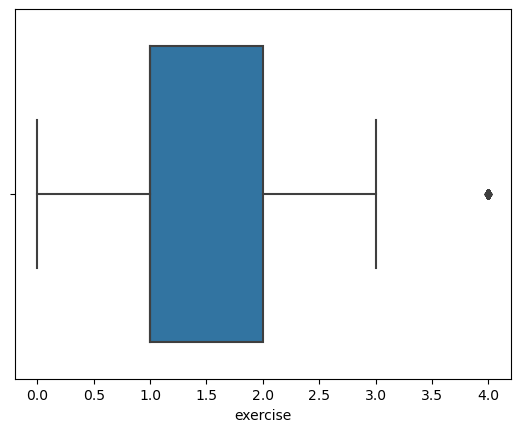

In [346]:
#We zien dat enkel 'exercise', 'sugar' en 'lifespan' duidelijke outliers bevatten, dus deze plotten we apart:

print(sns.boxplot(df_final, x = 'exercise'))

df_final.loc[df_final['exercise'] >= 4]

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan,BMI
1107,81,201,69,1,5,1,5,71,17
6393,80,168,93,2,3,6,5,76,33
7499,81,180,86,1,13,9,5,60,27
7655,81,204,61,1,4,5,5,72,15
2179,80,186,91,1,0,8,5,69,26
...,...,...,...,...,...,...,...,...,...
1604,80,154,87,1,14,3,5,54,37
7722,80,189,69,3,2,4,5,92,19
1591,80,190,98,1,12,2,5,62,27
6809,78,172,97,3,18,9,5,67,33


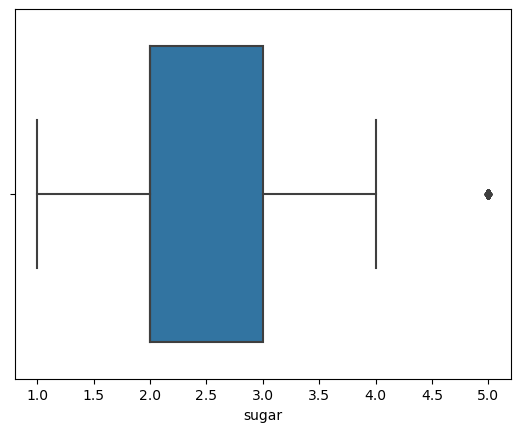

In [347]:
sns.boxplot(x=df_final['sugar'])

df_final.loc[df_final['sugar'] >= 5]

<AxesSubplot: xlabel='lifespan'>

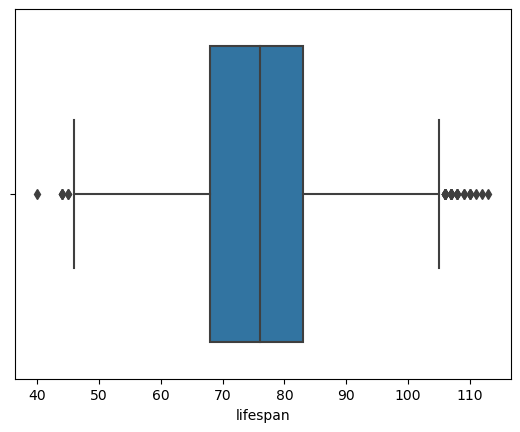

In [314]:
sns.boxplot(x=df_final['lifespan'])

In [ ]:
# In dit geval lijkt het mij niet wenselijk om de hierboven weergegeven 'outliers' echt als outliers te bestempelen.
# De hoofdreden hiervoor is het feit dat ons model straks ook voorspellingen moet kunnen maken voor bijvoorbeeld
# een suikerinname van 5, een exercise van 4, en willen we daarnaast ook kunnen voorspellen dat iemand een lifespan
# van 100+ heeft als de input hier naar is. 

In [291]:
# We kunnen ook nog een aantal andere interessante variabelen maken door gebruik te maken van de huidige variabelen.
# Zo kunnen we een BMI kolom maken om te kijken of deze wellicht meer voorspellende kracht heeft t.o.v. length en mass
# apart.

In [348]:
df_final['BMI'] = df_final['mass'] / ((df_final['length'])/100)**2

df_final.head()

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan,BMI
3670,78,184,74,2,17,6,2,74,21.857278
2244,80,184,74,3,0,2,3,97,21.857278
2465,80,172,93,3,3,2,2,100,31.435911
4499,82,175,74,2,4,3,4,79,24.163265
4203,79,175,77,2,9,8,3,70,25.142857


In [349]:
# Wat we zien is dat onze nieuwe variabel, BMI, een hogere correlatie heeft met 'lifespan' dan 'length' en 'mass'.
df_final.corr()['lifespan']['BMI']

-0.27696292866859495

In [350]:
df_final['BMI'] = df_final['BMI'].round(decimals=0)
df_final['BMI'] = df_final['BMI'].fillna(0.0).astype(int)

In [351]:
# Checken wat voor data we in elke kolom hebben
print(df_final.dtypes)
# kan ook met print(df_final.info())

genetic     int64
length      int64
mass        int64
exercise    int64
smoking     int64
alcohol     int64
sugar       int64
lifespan    int64
BMI         int64
dtype: object


In [352]:
# We zien dat we enkel met getallen (floats en ints) te maken hebben. Nu is de vraag: zijn dit allemaal numerieke waardes
# op een schaal, of zijn er binnen de variabelen misschien categoriën?

print(df_final.nunique())

genetic      9
length      61
mass        53
exercise     5
smoking     23
alcohol     11
sugar        5
lifespan    71
BMI         35
dtype: int64


In [353]:
# De variabelen 'length', 'mass', 'smoking' en 'lifespan' hebben de meeste verschillende waardes. 'Sugar' en 'exercise'
# lijken allebei te bestaan uit 5 verschillende waardes, variërend van 1 tot 5. Hier gaan we er even vanuit dat er geen 
# waardes tussen de hele getallen liggen, maar dit is wel iets om rekening mee te houden natuurlijk. 

In [354]:
# Voor de zekerheid bekijken we toch even of alle variabelen enkel hele getallen bevatten:

for c in df_final:
    print((df_final[c].fillna(-9999) % 1  == 0).all())

True
True
True
True
True
True
True
True
True


In [355]:
# Aangezien alle variabelen dus hele getallen zijn kunnen we alles omzetten naar integers, voor de eenvoud:

for c in df_final:
    df_final[c] = df_final[c].fillna(0.0).astype(int)
    

d_types = df_final.dtypes
print(d_types)

genetic     int64
length      int64
mass        int64
exercise    int64
smoking     int64
alcohol     int64
sugar       int64
lifespan    int64
BMI         int64
dtype: object


In [356]:
# Een volgende stap is om eens te kijken naar wat van de variabelen, hoe zit het bijvoorbeeld met de gemiddelde
# levensverwachting en suikerinname? 

df_final[['sugar', 'lifespan']].groupby(['sugar'], as_index=False).mean().sort_values(by='lifespan', ascending=False)

,sugar,lifespan
0,1,80.507310
1,2,77.256587
2,3,74.497067
3,4,71.179894
4,5,68.251969


In [357]:
# Hier zien we een duidelijke afname in levensverwachting naarmate 'sugar' een hogere waarde aanneemt. 
# Hetzelfde kunnen we doen voor 'exercise'

df_final[['exercise', 'lifespan']].groupby(['exercise'], as_index=False).mean().sort_values(by='lifespan')

,exercise,lifespan
0,0,63.641604
1,1,70.368364
2,2,79.246143
3,3,89.227121
4,4,95.465116


In [331]:
# Wat niet zozeer interessant is voor ons toekomstige model, maar wel interessant: hoe is het gesteld met het bewegen
# in deze dataset; 

In [358]:
df_final['exercise'].value_counts()

1    3711
2    2787
3    1202
0     399
4      86
Name: exercise, dtype: int64

           genetic    length      mass  exercise   smoking   alcohol  \
genetic   1.000000 -0.002151 -0.010059  0.004464 -0.011032  0.003612   
length   -0.002151  1.000000  0.017750 -0.007252 -0.008966  0.006750   
mass     -0.010059  0.017750  1.000000  0.004304  0.016148 -0.002182   
exercise  0.004464 -0.007252  0.004304  1.000000 -0.012758  0.005955   
smoking  -0.011032 -0.008966  0.016148 -0.012758  1.000000  0.001413   
alcohol   0.003612  0.006750 -0.002182  0.005955  0.001413  1.000000   
sugar    -0.006626 -0.015262  0.006780 -0.009249 -0.001368  0.013864   
lifespan  0.152144  0.179911 -0.201487  0.677365 -0.525613 -0.216818   
BMI      -0.007815 -0.658872  0.726374  0.005736  0.019794 -0.006283   

             sugar  lifespan       BMI  
genetic  -0.006626  0.152144 -0.007815  
length   -0.015262  0.179911 -0.658872  
mass      0.006780 -0.201487  0.726374  
exercise -0.009249  0.677365  0.005736  
smoking  -0.001368 -0.525613  0.019794  
alcohol   0.013864 -0.216818 -0.0

<AxesSubplot: >

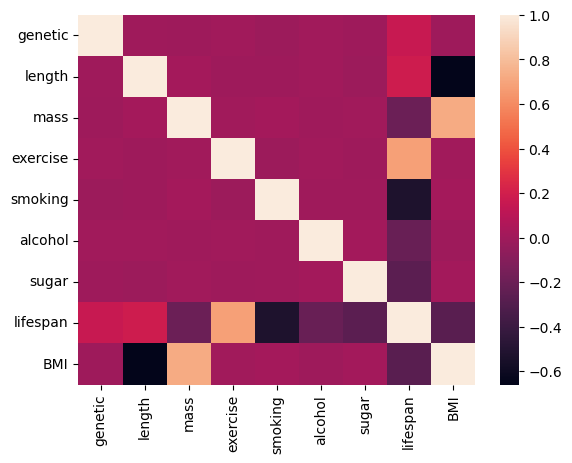

In [359]:
#We kunnen nu kijken naar eventuele onderlinge correlaties:
print(df_final.corr())
sns.heatmap(df_final.corr())

In [360]:
# Uiteindelijk zijn we natuurlijk vooral geinteresseerd in de correlatie van lifespan met de andere variabelen
df_final.corr()['lifespan']

genetic     0.152144
length      0.179911
mass       -0.201487
exercise    0.677365
smoking    -0.525613
alcohol    -0.216818
sugar      -0.263895
lifespan    1.000000
BMI        -0.276206
Name: lifespan, dtype: float64

In [367]:
# Om het model te trainen heb ik besloten om de length en mass variabelen te vervangen door BMI:

df_final = df_final.drop(['mass', 'length'], axis=1)

In [368]:
df_final.head()

,genetic,exercise,smoking,alcohol,sugar,lifespan,BMI
3670,78,2,17,6,2,74,22
2244,80,3,0,2,3,97,22
2465,80,3,3,2,2,100,31
4499,82,2,4,3,4,79,24
4203,79,2,9,8,3,70,25


In [369]:
# We hebben nu een werkbaar dataframe met al onze variabelen in de kolommen, en alle individuele patienten/datapunten
# in de rijen. We kunnen deze nu evt. als een nieuwe csv file exporteren, zonder index:

df_final.to_csv('data_clean.csv', index=False, sep=';')